# Project Analisis Data

In [1]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Customers Table

In [2]:
# Data customers
customers_df = pd.read_csv("customers.csv")

customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


Orders Table

In [3]:
orders_df = pd.read_csv("orders.csv")

orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


Product Table

In [4]:
product_df = pd.read_csv("products.csv")

product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


Sales Table

In [5]:
sales_df = pd.read_csv("sales.csv")

sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


### Assesing Data
Assesing data digunakan untuk menilai data apakah terdapat kejanggalan pada data

Customers Tabel

In [6]:
# Mengetahui informasi data seperti jumlah pengamatan, nama columns, tipe data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


Berdasarkan hasil running di atas pada tipe data sudah sesuai tetapi terdapat sedikit perbedaan pada jumlah pengamatan pada kolom gender, hasil ini menunjukkan bahwa pada kolom gender terdapat missing value. Untuk memastikan hal ini, dapat gunakan kode sebagai berikut.

In [7]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

Berdasarkan hasil di atas banyak missing value pada gender adalah 18 missing value.

Langkah selanjutnya adalah memeriksa duplikasi data.

In [8]:
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  6


Berdasarkan hasil di atas ada 6 data yang terduplikasi

Langkah selanjutnya memeriksa parameter statistik dari kolom numerik

In [9]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Pada hasil deskripsi di atas pada kolom age terdapat kejanggalan yaitu nilai maksimum adalah 700, kemungkinan besar terjadi karena inaccurate value pada kolom tersebut

Orders Table

In [10]:
# Mengetahui informasi data seperti jumlah pengamatan, nama columns, tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


Berdasarkan hasil di atas tipe data pada order_date dan delivery_date tidak sesuai harusnya menggunakan tipe data datetime

Langkah selanjutnya memeriksa duplikasi data

In [11]:
print('Jumlah duplikasi: ', orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


Diketahui bahwa pada data tidak terdapat duplikasi dan tidak ada keanehan pada deskripsi data

Product Table

In [13]:
# Mengetahui informasi data seperti jumlah pengamatan, nama columns, tipe data
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [14]:
print('Jumlah duplikasi: ', product_df.duplicated().sum())

Jumlah duplikasi:  6


In [15]:
product_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


Pada hasil di atas tidak terdapat missing value, tipe data sudah sesuai, dan tidak terdapat keanehan pada deskripsi data, tetapi terdapat duplikasi sebanyak 6 pada data

Sales Table

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Hasil di atas menunjukkan adanya missing value pada kolom total_price. untuk memastikan jumlah missing value dapat menggunakan kode berikut.

In [17]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

Terdapat 19 missing value pada kolom total_price

In [18]:
print('Jumlah duplikasi: ', sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil di atas tidak terdapat data yang duplikat dan tidak terdapat keanehan pada deskripsi data.

Berdasarkan hasil assesing data maka kesalahan pada data sebagai berikut
1.   Customer Table

> *   Terdapat 18 missing value pada kolom gender
> *   Terdapat 6 data yang terduplikat
> *   Terdapat inaccurate value pada kolom age

2.   Orders table

> *   Terdapat kesalahan tipe data pada kolom order_date & delivery_date

3.   Product Table

> *   Terdapat 6 data yang terduplikat

4.   Sales Table

> *   Terdapat 19 missing value pada kolom total_price



### Cleaning Data

Membersihkan data pada Customers Table

Menghilangkan data yang terduplikat dengan kode berikut

In [20]:
customers_df.drop_duplicates(inplace=True)

# Cek duplikasi
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan hasil di atas bahwa tidak terdapat lagi data yang terduplikasi

Menangani missing value

In [21]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


Dari tabel di atas terlihat missing value pada kolom gender, pada kasus ini jika missing value dibuang akan sangat disayangkan karena mengandung banyak informasi. Sehingga kita dapat mengisi nilai missing value. Langkah pertama kita harus mengetahui nilai apa yang terbanyak pada kolom gender karene merupakan data kategorik

In [22]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

Karena banyak yang mengisi Prefer not to say maka kita dapat mengganti nilai missing value dengan Prefer not to say

In [23]:
customers_df.fillna(value="Prefer not to say", inplace=True)

customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

Pada hasil di atas missing value berhasil diganti

Menangani inaccurate value

In [24]:
customers_df[customers_df.age==customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Mungkin nilai 700 itu adalah 70 karena adanya human error maka kita akan mengganti 700 menjadi 70

In [25]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

Untuk memastikan kode di atas berjalan sesuai harapan maka cek ulang kembali nilai maksimum

In [26]:
customers_df[customers_df.age==customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


Dari hasil di atas kode berjalan sesuai harapan tetapi masih terdapat kesalahan yang sama yaitu kemungkinan human error maka kita ulangi tahap sebelumnya

In [27]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

Untuk memastikan kembali lagi tidak terdapat kesalahan maka gunakan deskripsi

In [28]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Terlihat bahwa pada deskripsi tidak terdapat lagi keanehan

Membersihkan data pada Orders table

Mengganti tipe data menjadi datetime pada kolom order_date dan delivery_date

In [29]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


Terlihat bahwa tipe data berhasil untuk diubah

Membersihkan data dari Product Tabel

Menghilangkan data yang terduplikat

In [30]:
product_df.drop_duplicates(inplace=True)

print('Jumlah duplikasi: ', product_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat bahwa tidak terdapat data yang terduplikasi

Membersihkan data dari Sales Table

Menangani missing value

In [31]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


Berdasarkan di atas kita dapat mengganti missing value dengan perkalian price_per_unit dan quantity karena total_price merupakan perkalian dua kolom tersebut

In [32]:
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

Bersarkan hasil di atas tidak terdapat lagi missing value

## Exploratory Data Analysis (EDA)

### Data customers_df

In [33]:
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman dari statistika deskriptif di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur kisaran 20 sampai 80 tahun dengan rata-rata umur sebesar 49,87 tahun dengan standar deviasi sebesar 17,64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai remaja hingga lanjut usia.

Selanjutnya membuat demografi pelanggan berdasarkan jenis kelamin

In [34]:
customers_df.groupby(by='gender').agg({
    'customer_id' : 'nunique',
    'age' :['max','min','mean','std']
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Berdasarkan kota dan negara

In [35]:
customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [36]:
customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Berdasarkan hasil di atas kota dengan customer terbanyak adalah East Aidan dan negara dengan customer terbanyak adalah South Australia.

### Data orders_df

Membuat kolom baru yaitu delivery_time atau waktu pengiriman tiap order yaitu dengan menghitung selisih order_date dan delivery_date

In [37]:
delivery_time = orders_df['delivery_date'] - orders_df['order_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
323,324,99,10411,2021-07-05,2021-07-16,11.0
27,28,206,29968,2021-08-19,2021-09-04,16.0
252,253,179,38502,2021-09-10,2021-10-02,22.0
387,388,601,34341,2021-02-12,2021-02-17,5.0
554,555,922,42350,2021-09-03,2021-09-09,6.0


Terlihat sudah ditambahkan kolom baru yaitu delivery_time

Membuat rangkuman dari orders_df

In [38]:
orders_df.describe(include='all')

<ipython-input-38-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-38-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


Berdasarkan hasil rangkuman di atas rata-rata waktu pengiriman adalah 14 hari dengan waktu tercepat yaitu 1 hari dan paling lambat yaitu 27 hari

Setelah mempunyai informasi yang cukup terkait orders_df, selanjutnya kita dapat mencari informasi lain dengan menggabungkan data orders_df dengan customers_df

Pada orders_df terdapat kolom yang berisi informasi customer_id yang pernah melakukan order. Informasi ini dapat kita gunakan untuk mengetahui pelanggan mana yang belum pernah melakukan order sehingga kita dapat membuat kolom baru yaitu 'status' pada customer_id. misal kolom tersebut memiliki nilai 'active' dan 'non active'

In [39]:
customers_id_in_orders_df = orders_df.customer_id
customers_df['status'] = customers_df['customer_id'].apply(lambda x: "Active" if x in customers_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
804,801,fulan 801,Female,64,843 Goodwin MewsApt. 699,3128,Blakeborough,Australian Capital Territory,Australia,Active
780,778,fulan 778,Prefer not to say,20,33 Hamish ParkwayApt. 423,2902,Blakemouth,Northern Territory,Australia,Active
139,140,fulan 140,Prefer not to say,43,092 Jayden JunctionSuite 148,1058,Lukemouth,New South Wales,Australia,Active
608,607,fulan 607,Male,42,8397 Davis CrescentApt. 905,8092,North Gracetown,Northern Territory,Australia,Active
153,154,fulan 154,Prefer not to say,68,872 Mitchell SquareSuite 216,3751,East Angelinashire,Victoria,Australia,Active


Berdarkan kolom status kita dapat memperoleh informasi terkait pelanggan yang berstatus 'active' dan 'non active'

In [40]:
customers_df.groupby(by='status').customer_id.count()

status
Active        1000
Non Active       1
Name: customer_id, dtype: int64

Seperti hasil pivot tabel di atas maka hampir 100% pelanggan melakukan setidaknya 1 kali order. Untuk memperoleh lebih banyak informasi terkait kedua data di atas maka kita dapat mengganbungkan dua data tersebut melalui join atau merge

In [41]:
orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


Jumlah order berdasarkan kota

In [42]:
orders_customers_df.groupby(by='city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


Berdasarkan hasil di atas diketahui bahwa jumlah order terbanyak dari kota Jordanside dan New Ava

Jumlah order berdasarkan state

In [43]:
orders_customers_df.groupby(by='state').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


Berdasarkan hasil di atas diketahui bahwa jumlah order terbanyak dari South Australia

Jumlah order berdasarkan gender

In [44]:
orders_customers_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

Berdasarkan hasil di atas diketahui bahwa jumlah order terbanyak adalah prefer not say

Jumlah order berdasarkan kelompok usia

In [45]:
orders_customers_df['age_group'] = orders_customers_df.age.apply(lambda x : "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by='age_group').order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

Berdasarkan hasil di atas diketahui bahwa jumlah order terbanyak adalah kelompok umur dewasa

### Ekplorasi data product_df dan sales_df

In [46]:
product_df.describe(include='all')

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


Berdasarkan hasil di atas diketahui rentang harga produk berkisar dari 90 hingga 119 dolar.

In [47]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil di atas diketahui bahwa pada setiap transaksi pelanggan paling banyak membeli 3 item yang sama sekaligus dan total harga tertinggi adalah 357 dolar

Kita dapat melihat produk dengan harga tertinggi sampai terendah

In [48]:
product_df.sort_values(by='price', ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Selanjutnya kita dapat membuat pivot tabel berdasakan type product dan nama product

In [49]:
product_df.groupby(by='product_type').agg({
    'product_id' : 'nunique',
    'quantity' : 'sum',
    'price' : ['min', 'max']
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [50]:
product_df.groupby(by='product_name').agg({
    'product_id' : 'nunique',
    'quantity' : 'sum',
    'price' : ['min', 'max']
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Setelah melihat pivot tabel pasti kita akan merasa penasaran produk mana yang paling laris. maka kita akan menggabungkan tabel product_df dan sales_df

In [51]:
sales_product_df = pd.merge(
    left = sales_df,
    right = product_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Kita dapat membuat informasi penjualan berdasarkan type product

In [52]:
sales_product_df.groupby(by='product_type').agg({
    'sales_id' : 'nunique',
    'quantity_x' : 'sum',
    'total_price' : 'sum'
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Berdasarkan hasil di atas Trousers merupakan tipe product yang paling laris, akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe product yang paling banyak menyumbang revenue perusahaan.

Berdasarkan nama product

In [53]:
sales_product_df.groupby(by='product_name').agg({
    'sales_id' : 'nunique',
    'quantity_x' : 'sum',
    'total_price' : 'sum'
}).sort_values(by='total_price', ascending=False).head(10)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot tabel tersebut, diketahui bahwa produk Denim paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan

Selanjutnya menggabungkan semua tabel

### all_df
merupakan gabungan semua tabel

In [54]:
all_df = pd.merge(
    left = sales_product_df,
    right = orders_customers_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


Membuat pivot tabel penjualan bardasarkan state

In [55]:
all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x' : 'sum',
    'total_price' : 'sum'
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Dari pivot tabel kita dapat melihat tipe produk yang banyak di beli pada masing-masing state

Berdasarkan gender

In [56]:
all_df.groupby(by=['gender', 'product_type']).agg({
    'quantity_x' : 'sum',
    'total_price' : 'sum'
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

Berdasarkan gender rata-rata pembelian yang banyak adalah product jaket

In [57]:
all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x' : 'sum',
    'total_price' : 'sum'
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

Berdasarkan kelompok umur, kelompok umur Youth cenderung membeli Trouser

## Data Visualization

Performa penjualan dan revenue per bulan selama setahun

In [58]:
monthly_order_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id' : 'nunique',
    'total_price' : 'sum'
})

monthly_order_df.index = monthly_order_df.index.strftime('%Y-%m')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    'order_id' : 'order_count',
    'total_price' :'revenue'
}, inplace = True)

monthly_order_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


Kita sudah mendapatkan df tentang total penjulaan dan revenue per bulan, selanjutnya adalah membuat line chart untuk melihat performa total penjulaan dan revenue per bulan

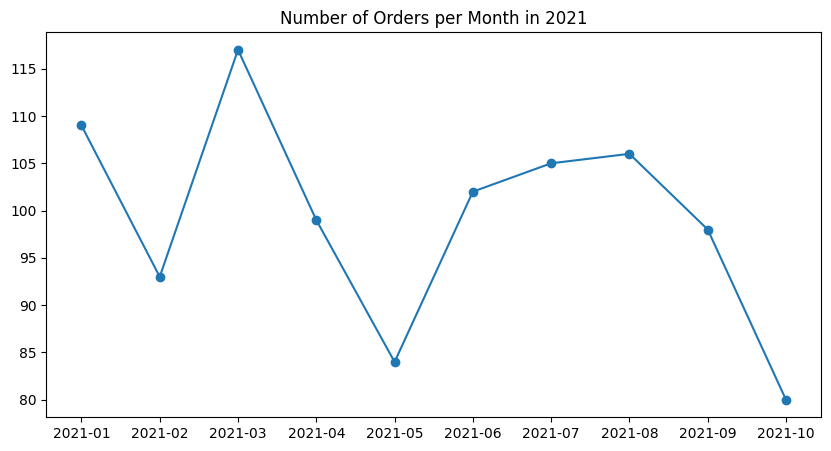

In [59]:
plt.figure(figsize=(10,5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['order_count'], marker='o',)
plt.title('Number of Orders per Month in 2021', loc='center')
plt.show()

Kalau ingin membuat x labal dalam nama bulan

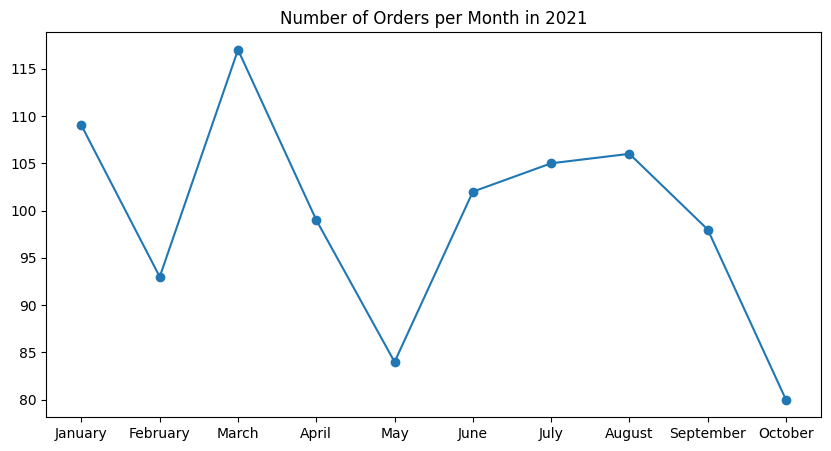

In [60]:
monthly_order_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id' : 'nunique',
    'total_price' : 'sum'
})

monthly_order_df.index = monthly_order_df.index.strftime('%B')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    'order_id' : 'order_count',
    'total_price' :'revenue'
}, inplace = True)

plt.figure(figsize=(10,5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['order_count'], marker='o',)
plt.title('Number of Orders per Month in 2021', loc='center')
plt.show()

Terlihat bahwa terjadi penurunan order yang signifikan di bulan Februari, April, Mei dan Oktober. Hal ini tentunya akan mempengaruhi revenue yang diperoleh. berikut line chart revenue

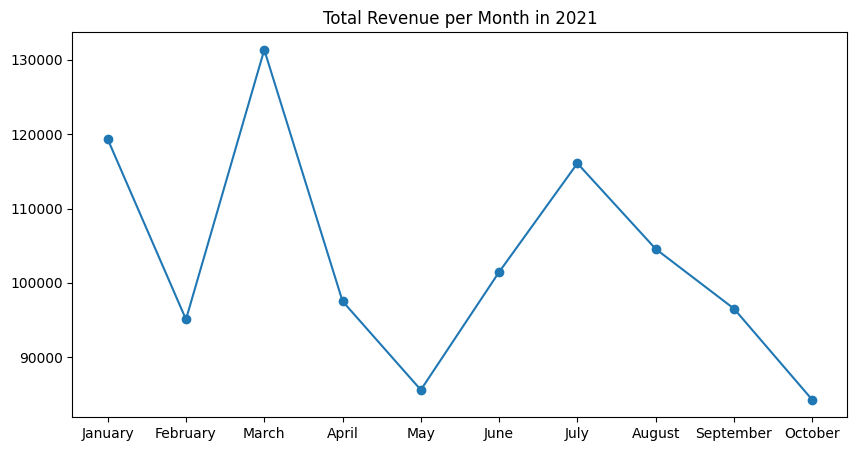

In [61]:
plt.figure(figsize=(10,5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['revenue'], marker='o',)
plt.title('Total Revenue per Month in 2021', loc='center')
plt.show()

Jumlah order yang berdampak pada revenue tentunya kita harus mencari tahu penyebab terjadinya penurunan tersebut.

Produk yang paling banyak terjual dan paling sedikit

In [62]:
sum_order_item_df = all_df.groupby(by='product_name').quantity_x.sum().sort_values(ascending = False).reset_index()
sum_order_item_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


Disini kita akan membuat 5 product dengan penjualan terbanyak dan 5 produk dengan penjual tersedikit

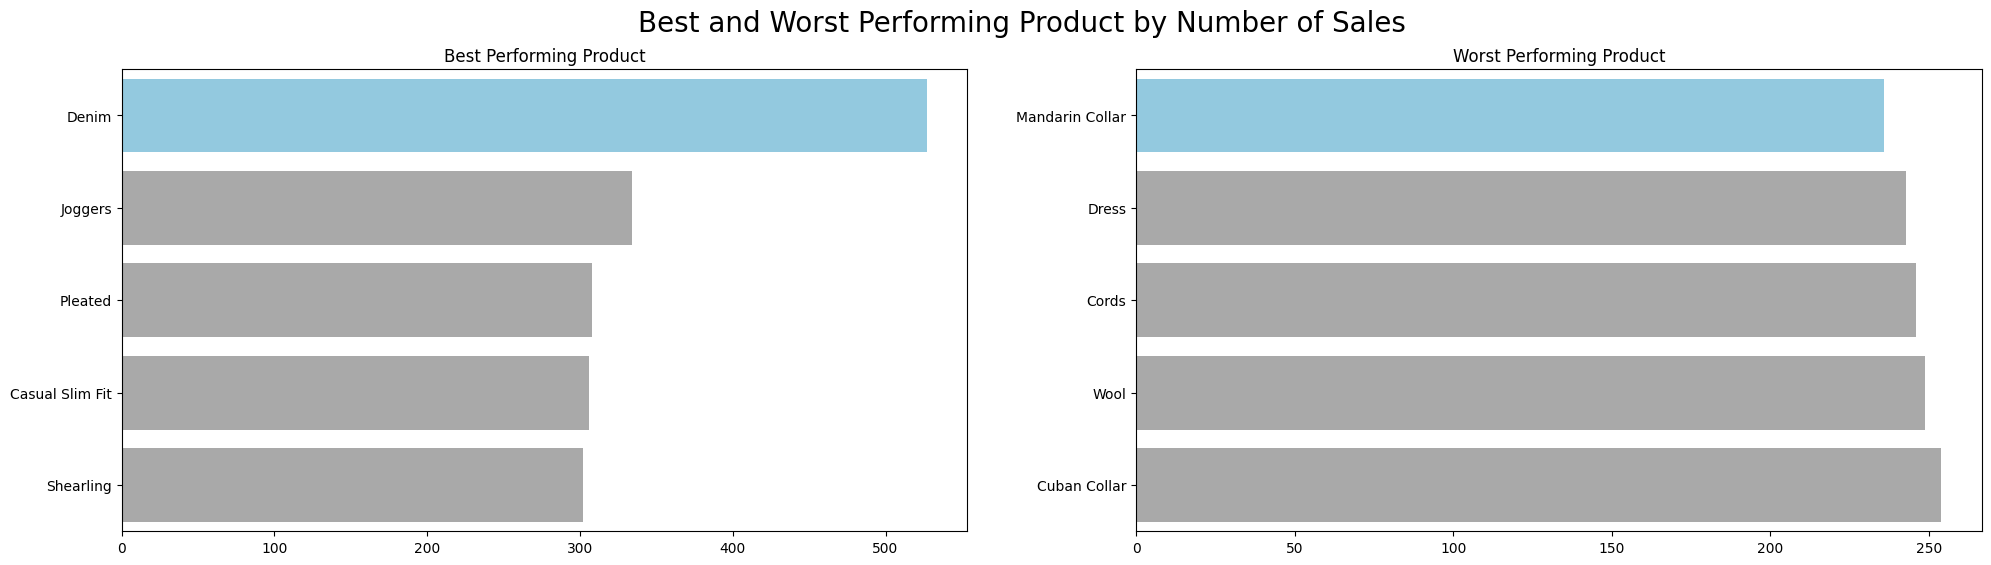

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ['skyblue','darkgray','darkgray','darkgray','darkgray']
sns.barplot(x='quantity_x', y='product_name', data=sum_order_item_df.head(5),
            palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Best Performing Product', loc='center')

sns.barplot(x='quantity_x', y='product_name',
            data=sum_order_item_df.sort_values(by='quantity_x',ascending=True).head(5),
            palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title('Worst Performing Product', loc='center')

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)
plt.show()

Demografi Pelanggan

Berdasarkan gender

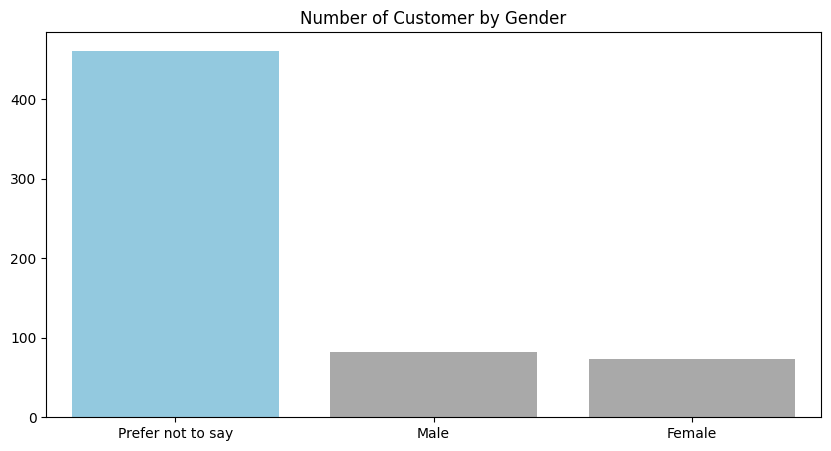

In [64]:
by_gender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
by_gender_df.rename(columns={
    'customer_id' : 'customer_count'
}, inplace = True)

plt.figure(figsize=(10,5))
sns.barplot(
    x='gender',
    y='customer_count',
    data=by_gender_df.sort_values(by='customer_count',ascending=False),
    palette=['skyblue','darkgray','darkgray']
)

plt.title('Number of Customer by Gender', loc='center')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Berdasarkan gambar di atas kebanyakan pelanggan tidak bersedia untuk memberitahu informasi gender

Berdasarkan kelompok umur

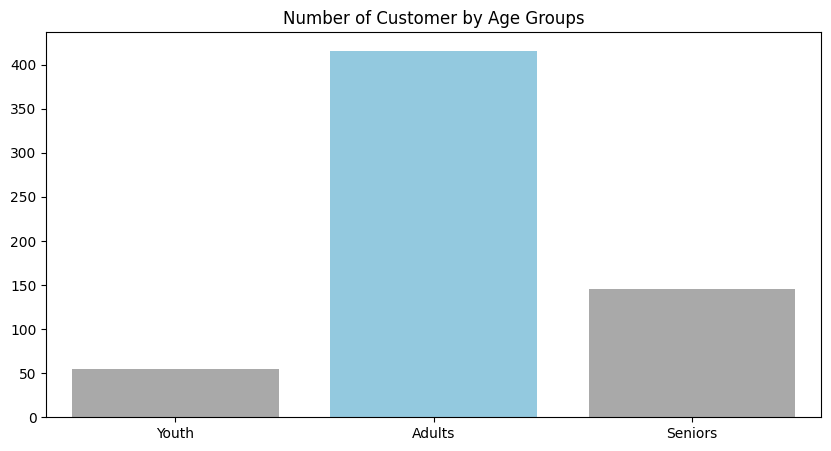

In [65]:
by_age_df = all_df.groupby(by='age_group').customer_id.nunique().reset_index()
by_age_df.rename(columns={
    'customer_id' : 'customer_count'
}, inplace = True)
by_age_df['age_group'] = pd.Categorical(by_age_df['age_group'],['Youth','Adults','Seniors'])

plt.figure(figsize=(10,5))
sns.barplot(
    x='age_group',
    y='customer_count',
    data=by_age_df,
    palette = ['darkgray','skyblue','darkgray']
)

plt.title('Number of Customer by Age Groups', loc='center')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Dari gambar di atas dikatahui bahwa pelanggan didominasi oleh kelompok usias dewasa

Berdasarkan state

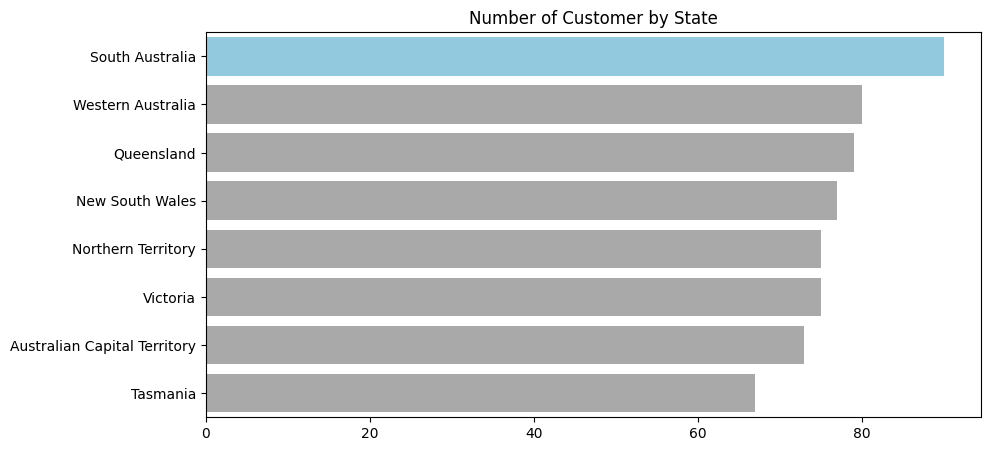

In [66]:
by_state_df = all_df.groupby(by='state').customer_id.nunique().reset_index()
by_state_df.rename(columns={
    'customer_id' : 'customer_count'
}, inplace = True)

colors = ['skyblue','darkgray','darkgray','darkgray','darkgray','darkgray',
          'darkgray','darkgray']
plt.figure(figsize=(10,5))
sns.barplot(
    x='customer_count',
    y='state',
    data=by_state_df.sort_values(by='customer_count', ascending=False),
    palette=colors
)

plt.title('Number of Customer by State', loc='center')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Berdasarkan gambar di atas pelanggan kebanyakan berasal dari South Australia